# Table of Contents

* [Import Python Packages and Libraries](#Import-Python-Packages-and-Libraries)

* [Import Data](#Import-Data)

* [Clean Data](#Clean-Data)

* [United States Analysis](#United-States-Analysis)
    - [Cumulative Cases Per State](#Cumulative-Cases-Per-State)
    - [Cumulative Number of Deaths Per State](#Cumulative-Number-of-Deaths-Per-State)
    - [Testing Time Series](#Testing-Time-Series)
    - [Hospitalization Time Series](#Hospitalization-Time-Series)
    - [Active Cases Per State](#Active-Cases-Per-State)
    - [Map of Cumulative log10(Deaths)](#Map-of-Cumulative-log10(Deaths))
    
    
* [World Analysis](#World-Analysis)

## Import Python Packages and Libraries

In [2]:
import io
import requests

import bokeh
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
import folium


In [3]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
pd.set_option('display.max_columns', None)

## Import Data 

In [4]:
# x = pd.read_html(
#     'https://docs.google.com/'
#     'spreadsheets/u/2/d/e/2PACX-1vRwAqp96T9sYYq2-i7Tj0pvTf6XVHjDSMIKBdZHXiCGGdNC0ypEU9NbngS8mxea55JuCFuua1MUeOj5/'
#     'pubhtml#', header=1, index_col=0)

x = pd.read_csv('data/all-states-history.csv')
x.head()


,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-11-30,AK,A,121.0,121.0,0,NaN,725.0,725.0,162.0,3,NaN,NaN,980073.0,4709,NaN,NaN,971946.0,NaN,27.0,31323.0,NaN,507,0,NaN,NaN,NaN,NaN,38426.0,7165.0,NaN,0,1011396.0,5216,NaN,NaN,NaN,NaN,NaN,0,1011396.0,5216
1,2020-11-30,AL,A,3578.0,3246.0,1,332.0,25338.0,25338.0,1717.0,668,2237.0,NaN,1376324.0,2554,NaN,NaN,NaN,1288.0,NaN,249524.0,208023.0,2295,0,NaN,NaN,NaN,NaN,NaN,161946.0,NaN,0,1584347.0,4634,NaN,NaN,71698.0,NaN,NaN,0,1584347.0,4634
2,2020-11-30,AR,A+,2502.0,2295.0,32,207.0,8937.0,8937.0,1063.0,94,NaN,407.0,1545401.0,6663,NaN,NaN,1545401.0,989.0,211.0,157359.0,138056.0,1112,0,NaN,3300.0,NaN,23474.0,NaN,138696.0,NaN,0,1683457.0,7629,NaN,21856.0,NaN,136774.0,NaN,0,1683457.0,7629
3,2020-11-30,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,1988.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-11-30,AZ,A+,6639.0,6152.0,5,487.0,25786.0,25786.0,2513.0,218,NaN,579.0,1936949.0,16630,NaN,NaN,NaN,NaN,352.0,326817.0,316740.0,822,0,NaN,NaN,NaN,NaN,NaN,52438.0,NaN,0,2253689.0,17364,364625.0,NaN,NaN,NaN,2253689.0,17364,NaN,0


In [5]:
x['inIcuCurrently']

0          NaN
1          NaN
2        407.0
3          NaN
4        579.0
         ...  
15292      NaN
15293      NaN
15294      NaN
15295      NaN
15296      NaN
Name: inIcuCurrently, Length: 15297, dtype: float64

In [6]:
xx = x[['date', 'state', 'dataQualityGrade', 
        'death', 'deathIncrease', 'hospitalized', 
        'hospitalizedCumulative', 'hospitalizedCurrently',
        'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently',
        'negative', 'negativeIncrease', 'onVentilatorCumulative', 'onVentilatorCurrently',
        'positive', 'positiveIncrease', 'recovered'
       ]]

## Clean Data

In [7]:
df = xx.copy()

cols = ['Date', 'State', 'DQ', 'Deaths', 'Death Increase', 
        'Hospitalized', 'Hospitalized Cumulative', 'Hospitalized Currently',
        'Hospitalized Increase', 'In ICU Cumulative', 'In ICU Currently', 'Negative', 
        'Negative Increase', 'On Ventilator Cumulative', 'On Ventilator Currently', 'Positive', 'Positive Increase', 'Recovered'
       ]

# cols = ['Date', 'State', 'Positive',
#         'Negative', 'Pending', 'Hospitalized Currently', 
#         'Hospitalized Cumulative', 'In ICU Currently', 'In ICU Cumulative',
#         'On Ventilator Currently', 'On Ventilator Cumulitve',
#         'Recovered', 'Deaths', 'Data Quality Grade', 'Latest Update ET'
#        ]

df.columns = cols
df = df.reset_index(drop=True).dropna(how='all')
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y-%m-%d' )
df = df.sort_values('Date')

df_recent =  df.groupby('State', as_index=False).last()
df_recent.fillna(0, inplace=True)
df_recent['Active Cases'] = df_recent['Positive']-df_recent['Recovered']-df_recent['Deaths']

In [8]:
df_recent.head()

,State,Date,DQ,Deaths,Death Increase,Hospitalized,Hospitalized Cumulative,Hospitalized Currently,Hospitalized Increase,In ICU Cumulative,In ICU Currently,Negative,Negative Increase,On Ventilator Cumulative,On Ventilator Currently,Positive,Positive Increase,Recovered,Active Cases
0,AK,2020-11-30,A,121.0,0,725.0,725.0,162.0,3,0.0,0.0,980073.0,4709,0.0,27.0,31323.0,507,7165.0,24037.0
1,AL,2020-11-30,A,3578.0,1,25338.0,25338.0,1717.0,668,2237.0,0.0,1376324.0,2554,1288.0,0.0,249524.0,2295,161946.0,84000.0
2,AR,2020-11-30,A+,2502.0,32,8937.0,8937.0,1063.0,94,43.0,407.0,1545401.0,6663,989.0,211.0,157359.0,1112,138696.0,16161.0
3,AS,2020-11-30,D,0.0,0,0.0,0.0,0.0,0,0.0,0.0,1988.0,0,0.0,0.0,0.0,0,0.0,0.0
4,AZ,2020-11-30,A+,6639.0,5,25786.0,25786.0,2513.0,218,0.0,579.0,1936949.0,16630,0.0,352.0,326817.0,822,52438.0,267740.0


## United States Analysis

### Cumulative Cases Per State

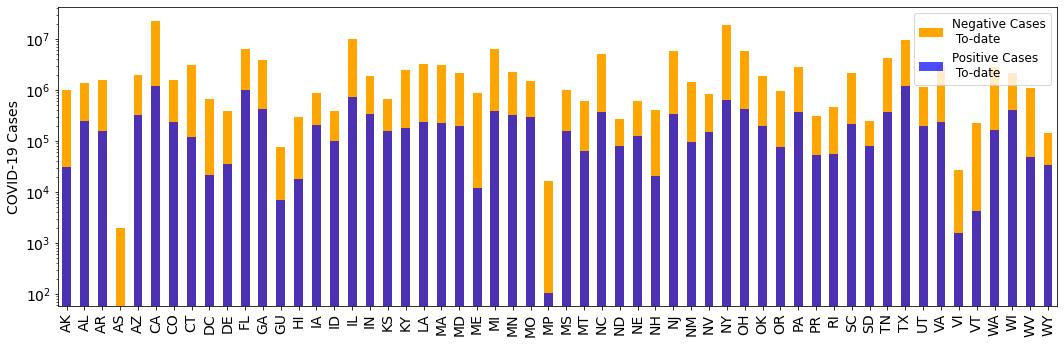

In [9]:
fig, ax = plt.subplots(figsize=(15,5))

df_recent['Negative'].plot(ax=ax, kind='bar', x='State', 
                           color='orange',
                           label='Negative Cases\n To-date',
                          )

df_recent['Positive'].plot(ax=ax, kind='bar', x='State',
                          color='blue', 
                           label='Positive Cases \n To-date',
                           alpha=.7
                          )

ax.set_xticklabels(df_recent['State'].values)
ax.set_ylabel('COVID-19 Cases')
ax. semilogy()

plt.legend(prop={'size':12})
plt.tight_layout()

### Cumulative Number of Deaths Per State

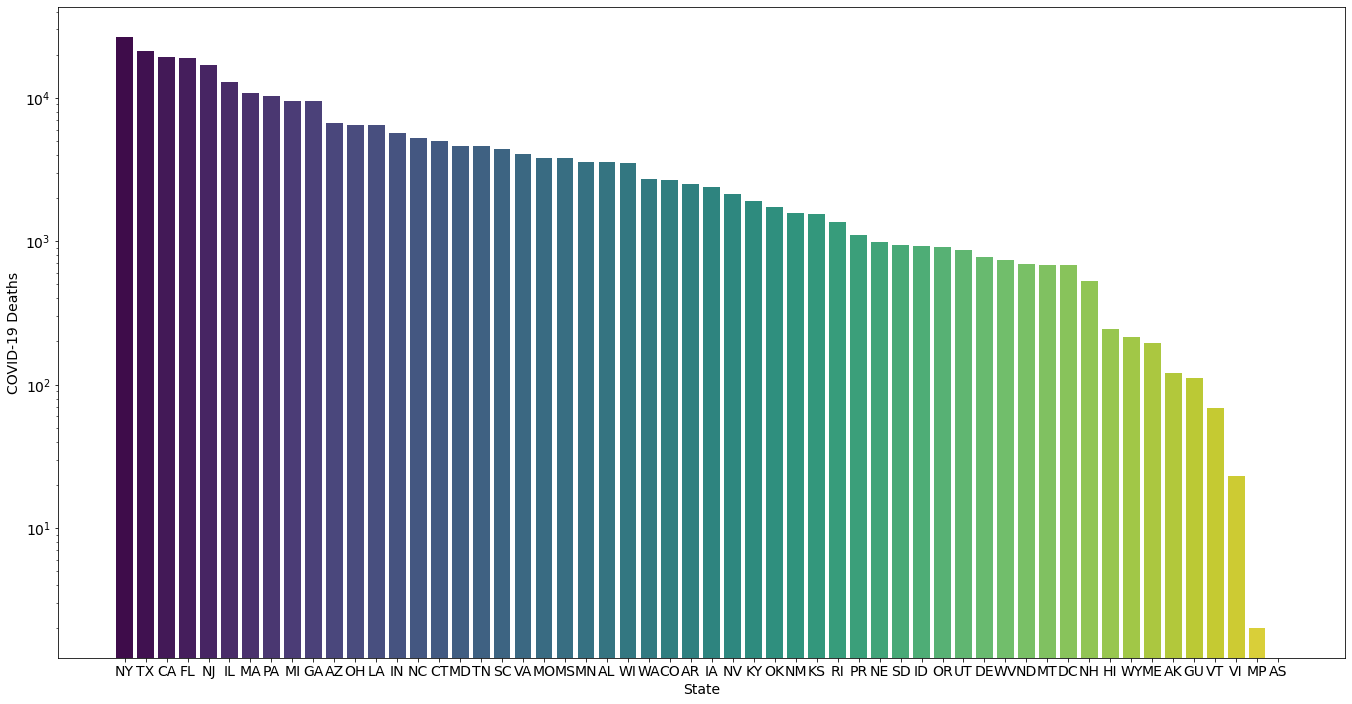

In [10]:
df_desc_recent = df_recent.sort_values(by='Deaths', ascending=False)

fig, ax = plt.subplots(figsize=(19, 10))
sns.barplot(x=df_desc_recent['State'],
            y=df_desc_recent['Deaths'],
           palette=sns.color_palette(
               plt.get_cmap('viridis_r')(np.linspace(1,0,len(df_desc_recent)))))
ax.set_ylabel(r'COVID-19 Deaths')

plt.semilogy()
plt.tight_layout()

### Testing Time Series

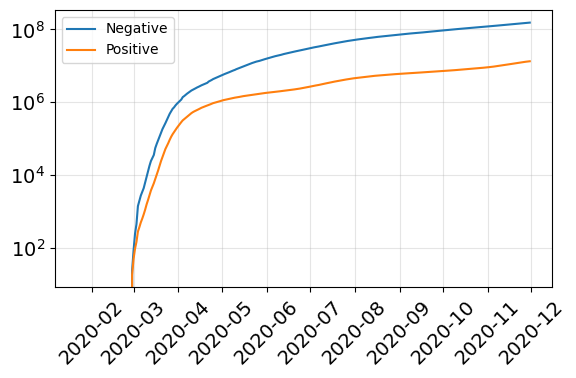

In [17]:
dfs = df.groupby('Date', as_index=False).sum()
xtickdates = pd.to_datetime(
    '2020-02-01 2020-03-01 2020-04-01 2020-05-01 2020-06-01 2020-07-01 2020-08-01 2020-09-01 2020-10-01 2020-11-01'.split())

fig, ax = plt.subplots(dpi=100)
ax.plot(dfs.Date, dfs.Negative, label='Negative')
ax.plot(dfs.Date, dfs.Positive, label='Positive')
ax.legend( prop={'size': 10})
plt.xticks(rotation=45)
plt.grid(alpha=.33)
ax.semilogy()
plt.tight_layout()

### Hospitalization Time Series

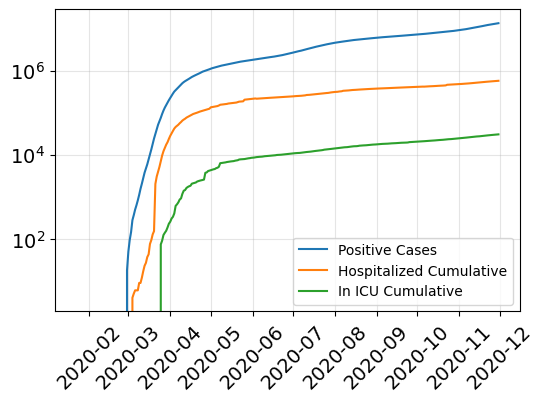

In [18]:
dfs = df.groupby('Date', as_index=False).sum()

fig, ax = plt.subplots(dpi=100)
ax.plot(dfs.Date, dfs['Positive'], label='Positive Cases')
ax.plot(dfs.Date, dfs['Hospitalized Cumulative'], label='Hospitalized Cumulative')
ax.plot(dfs.Date, dfs['In ICU Cumulative'], label='In ICU Cumulative')


ax.legend(loc='lower right', prop={'size': 10})
plt.xticks(rotation=45)
plt.grid(alpha=.33)
ax.semilogy()
plt.tight_layout;

### Active Cases Per State

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

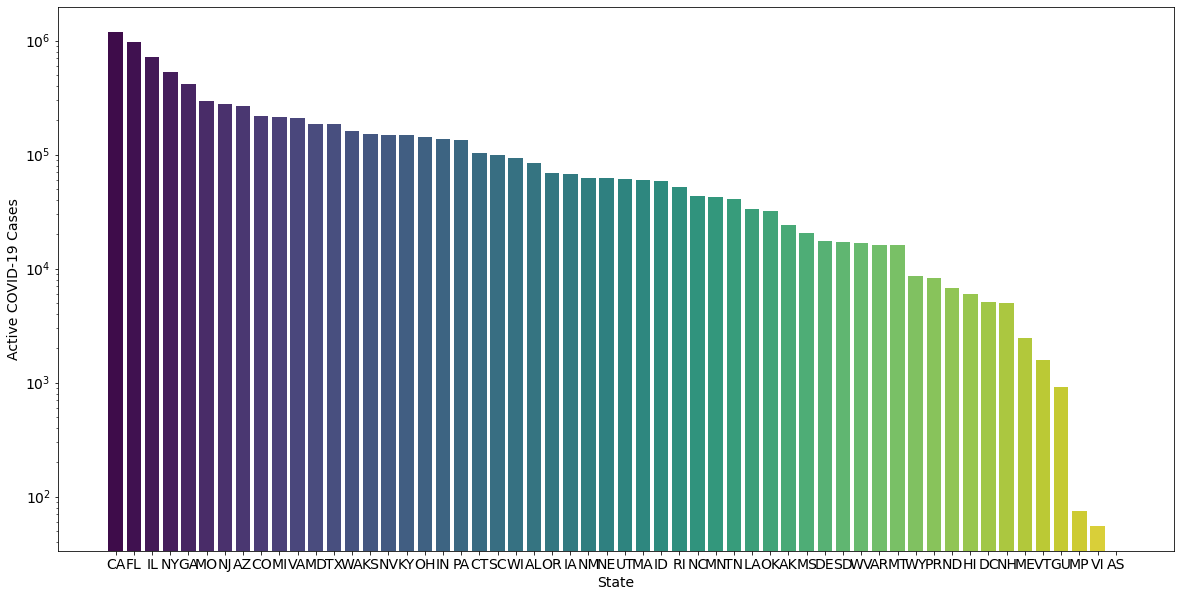

In [15]:
df_active = df_recent.sort_values(by='Active Cases', ascending=False)

fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x=df_active['State'], y=df_active['Active Cases'], 
           palette=sns.color_palette(
               plt.get_cmap('viridis_r')(np.linspace(1,0,len(df_desc_recent)))))

ax.set_ylabel('Active COVID-19 Cases')
ax.semilogy()
plt.tight_layout


### Map of Cumulative log10(Deaths)

In [48]:
df_map = df[df['Date'] == df['Date'].max()][['State','Deaths']]
df_map['log10Deaths'] = np.log10(df_map['Deaths'])
df_map['log10Deaths'] = df_map['log10Deaths'].replace(-np.inf, np.nan)

m = folium.Map(location=[40, -102], zoom_start=3)


folium.Choropleth(
    geo_data='data/us-states.json',
    data=df_map,
    columns=['State', 'log10Deaths'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.4,
    line_opacity=0.5,
    legend_name='COVID-19 log10(Deaths)',
    reset=True
).add_to(m)
m

In [49]:
x = pd.read_html('data/corona_age_sex.html', encoding='utf-8')[0]
x['Sex'] = x.Sex.fillna(method='ffill')
x = x.dropna()


In [50]:
x[x['Age group'].str.contains('ages')]

,Sex,Age group,All Deaths involving COVID-19 (U07.1)1,Deaths from All Causes,"Deaths involving Pneumonia, with or without COVID-19, excluding Influenza deaths(J12.0–J18.9)2","Deaths involving COVID-19 and Pneumonia, excluding Influenza(U07.1 and J12.0–J18.9)2","All Deaths involving Influenza, with or without COVID-19 or Pneumonia(J09–J11)3","Deaths involving Pneumonia, Influenza, or COVID-19(U07.1 or J09–J18.9)4",Population5
1,Total,All ages,240213.0,2579548.0,242296.0,109504.0,6829.0,378800.0,328239523.0
14,Males,All ages,130005.0,1346939.0,133445.0,62138.0,3528.0,204206.0,161657324.0
27,Females,All ages,110202.0,1232515.0,108844.0,47362.0,3300.0,174584.0,166582199.0


In [51]:
nt = x[~x['Age group'].str.contains('ages')].groupby(['Sex', 'Age group']).sum()
nt

All Deaths involving COVID-19 (U07.1)1  \
Sex     Age group                                                   
Females 15–24 years                                         166.0   
        1–4 years                                             8.0   
        25–34 years                                         643.0   
        35–44 years                                        1531.0   
        45–54 years                                        4001.0   
        55–64 years                                       10603.0   
        5–14 years                                           15.0   
        65–74 years                                       20051.0   
        75–84 years                                       28872.0   
        85 years and over                                 44303.0   
        Under 1 year                                          9.0   
Males   15–24 years                                         262.0   
        1–4 years                                             8.0   
        25–34 years                                        1169.0   
        35–44 years                                        3132.0   
        45–54 years                                        8368.0   
        55–64 years                                       19285.0   
        5–14 years                                           27.0   
        65–74 years                                       31615.0   
        75–84 years                                       35702.0   
        85 years and over                                 30417.0   
        Under 1 year                                         20.0   
Total   15–24 years                                         428.0   
        1–4 years                                            16.0   
        25–34 years                                        1812.0   
        35–44 years                                        4663.0   
        45–54 years                                       12371.0   
        55–64 years                                       29888.0   
        5–14 years                                           42.0   
        65–74 years                                       51667.0   
        75–84 years                                       64575.0   
        85 years and over                                 74722.0   
        Under 1 year                                         29.0   

                           Deaths from All Causes  \
Sex     Age group                                   
Females 15–24 years                        7280.0   
        1–4 years                          1133.0   
        25–34 years                       16749.0   
        35–44 years                       27650.0   
        45–54 years                       54812.0   
        55–64 years                      129646.0   
        5–14 years                         1743.0   
        65–74 years                      214954.0   
        75–84 years                      299581.0   
        85 years and over                472472.0   
        Under 1 year                       6495.0   
Males   15–24 years                       20737.0   
        1–4 years                          1585.0   
        25–34 years                       40500.0   
        35–44 years                       53199.0   
        45–54 years                       92454.0   
        55–64 years                      207645.0   
        5–14 years                         2623.0   
        65–74 years                      297285.0   
        75–84 years                      324116.0   
        85 years and over                298732.0   
        Under 1 year                       8063.0   
Total   15–24 years                       28020.0   
        1–4 years                          2718.0   
        25–34 years                       57251.0   
        35–44 years                       80852.0   
        45–54 years                      147270.0   
        55–64 years                      337300.0   
        5–14 years   

In [52]:
total_deaths = x['All Deaths involving COVID-19 (U07.1)1'].max()

In [53]:
x['percentage_dead']= x['All Deaths involving COVID-19 (U07.1)1']/total_deaths*100

In [54]:
x.groupby(['Sex', 'Age group']).sum()

All Deaths involving COVID-19 (U07.1)1  \
Sex     Age group                                                   
Females 15–24 years                                         166.0   
        1–4 years                                             8.0   
        25–34 years                                         643.0   
        35–44 years                                        1531.0   
        45–54 years                                        4001.0   
        55–64 years                                       10603.0   
        5–14 years                                           15.0   
        65–74 years                                       20051.0   
        75–84 years                                       28872.0   
        85 years and over                                 44303.0   
        All ages                                         110202.0   
        Under 1 year                                          9.0   
Males   15–24 years                                         262.0   
        1–4 years                                             8.0   
        25–34 years                                        1169.0   
        35–44 years                                        3132.0   
        45–54 years                                        8368.0   
        55–64 years                                       19285.0   
        5–14 years                                           27.0   
        65–74 years                                       31615.0   
        75–84 years                                       35702.0   
        85 years and over                                 30417.0   
        All ages                                         130005.0   
        Under 1 year                                         20.0   
Total   15–24 years                                         428.0   
        1–4 years                                            16.0   
        25–34 years                                        1812.0   
        35–44 years                                        4663.0   
        45–54 years                                       12371.0   
        55–64 years                                       29888.0   
        5–14 years                                           42.0   
        65–74 years                                       51667.0   
        75–84 years                                       64575.0   
        85 years and over                                 74722.0   
        All ages                                         240213.0   
        Under 1 year                                         29.0   

                           Deaths from All Causes  \
Sex     Age group                                   
Females 15–24 years                        7280.0   
        1–4 years                          1133.0   
        25–34 years                       16749.0   
        35–44 years                       27650.0   
        45–54 years                       54812.0   
        55–64 years                      129646.0   
        5–14 years                         1743.0   
        65–74 years                      214954.0   
        75–84 years                      299581.0   
        85 years and over                472472.0   
        All ages                        1232515.0   
        Under 1 year                       6495.0   
Males   15–24 years                       20737.0   
        1–4 years                          1585.0   
        25–34 years                       40500.0   
        35–44 years                       53199.0   
        45–54 years                       92454.0   
        55–64 years                      207645.0   
        5–14 years                         2623.0   
        65–74 years                      297285.0   
        75–84 years                      324116.0   
        85 years and over                298732.0   
        All ages                        1346939.0   
        Under 1 year                       8063.0   
Total   15–24 years       

[]

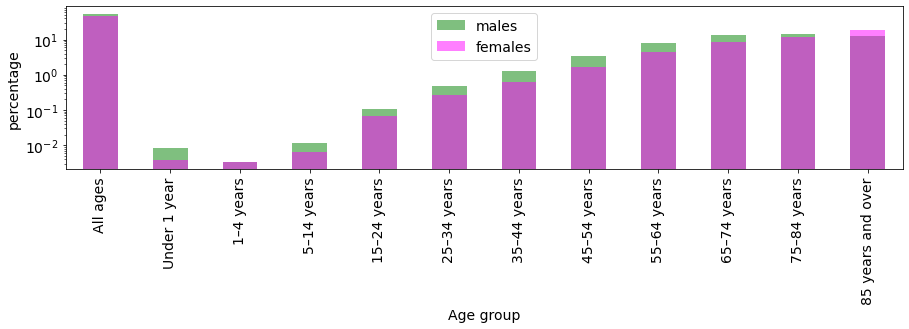

In [55]:
fdf = x[(x['Sex']=='Females')][['Age group', 'percentage_dead']]
mdf = x[(x['Sex']=='Males')][['Age group', 'percentage_dead']]
tdf = x[(x['Sex']=='Total')][['Age group', 'percentage_dead']]


fig, ax = plt.subplots(figsize=(15,3))
mdf.plot.bar(ax=ax, x='Age group', rot=90, color='green', alpha=.5)
fdf.plot.bar(ax=ax, x='Age group', rot=90, color='magenta', alpha=.5)

ax.set(ylabel='percentage')
ax.legend(['males', 'females'])
ax.semilogy()


Text(0, 0.5, 'Percent of the Dead')

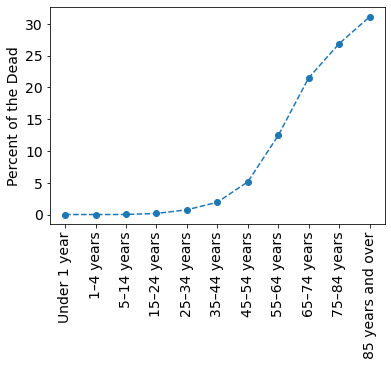

In [56]:

fig, ax = plt.subplots()
ax.plot(tdf['Age group'][1:], tdf['percentage_dead'][1:], '--o')
plt.xticks(rotation=90)
plt.ylabel('Percent of the Dead')

In [57]:
mfdf = mdf.merge(fdf, on=['Age group'], suffixes=('_m', '_f'))
mfdf['total_percentage_dead'] = mfdf['percentage_dead_m'] + mfdf['percentage_dead_f']

In [58]:
mfdf

,Age group,percentage_dead_m,percentage_dead_f,total_percentage_dead
0,All ages,54.120718,45.876784,99.997502
1,Under 1 year,0.008326,0.003747,0.012073
2,1–4 years,0.003330,0.003330,0.006661
3,5–14 years,0.011240,0.006244,0.017484
4,15–24 years,0.109070,0.069105,0.178175
5,25–34 years,0.486651,0.267679,0.754331
6,35–44 years,1.303843,0.637351,1.941194
7,45–54 years,3.483575,1.665605,5.149180
8,55–64 years,8.028292,4.413999,12.442291
9,65–74 years,13.161236,8.347175,21.508411


<ipython-input-60-a40831265c0a>:3: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax.fill_between(x, 0, y, '--o')
<ipython-input-60-a40831265c0a>:4: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax.fill_between(x, y, 1, '--o', color='m')


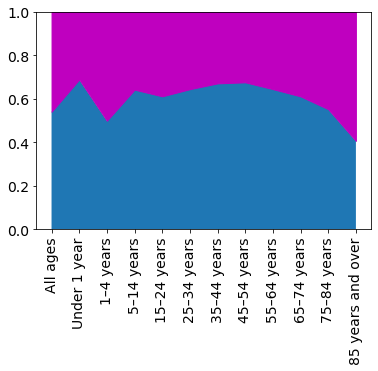

In [60]:
x, y = mfdf['Age group'], mfdf['percentage_dead_m']/mfdf['total_percentage_dead']
fig, ax = plt.subplots()
ax.fill_between(x, 0, y, '--o')
ax.fill_between(x, y, 1, '--o', color='m')

plt.xticks(rotation=90)
plt.ylim(0,1);